Titanic Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Loading the Dataset

In [ ]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Initial Analysis on dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
149,0,2,male,42.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
41,0,2,female,27.0,1,0,21.0000,S,Second,woman,False,NaN,Southampton,no,False
519,0,3,male,32.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
355,0,3,male,28.0,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
404,0,3,female,20.0,0,0,8.6625,S,Third,woman,False,NaN,Southampton,no,True
156,1,3,female,16.0,0,0,7.7333,Q,Third,woman,False,NaN,Queenstown,yes,True
261,1,3,male,3.0,4,2,31.3875,S,Third,child,False,NaN,Southampton,yes,False
499,0,3,male,24.0,0,0,7.7958,S,Third,man,True,NaN,Southampton,no,True
626,0,2,male,57.0,0,0,12.3500,Q,Second,man,True,NaN,Queenstown,no,True
517,0,3,male,NaN,0,0,24.1500,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
#pclass,class and embark,embark_town and alive,survived are same so removing one of each
df.drop(["class","embarked","alive"],axis=1,inplace=True)

In [ ]:
#check for null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [ ]:
#we observe that deck variable has a lot of missing values than present values so drop the variable
df.drop(["deck"],axis=1,inplace=True)

<Axes: xlabel='pclass', ylabel='age'>

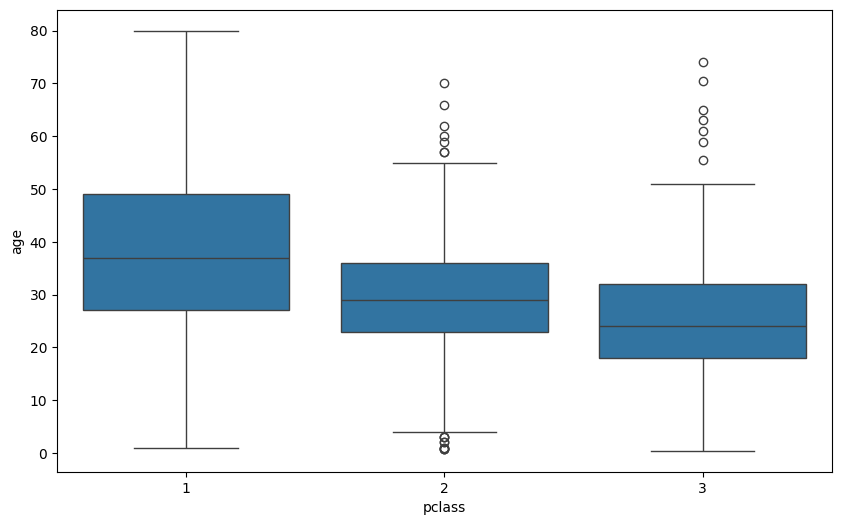

In [ ]:
#now we need to fill age variable's null values
#we cant fill it with mean because missing values count is large
#so, check the relation between  variable 'pclass' and 'age' variable

plt.figure(figsize=(10,6))
sns.boxplot(x="pclass",y="age",data=df)

By above boxplot we can analyse that pclass of 1 have an average age of 38, pclass 2 have 29 and pclass 3 have 23. we will fill null values according to this.

In [ ]:
def fill_age(columns):
  age=columns[0]
  pclass=columns[1]
  if pd.isnull(age):
    if pclass==1:
      return 38
    elif pclass==2:
      return 29
    else:
      return 23
  else:
    return age

In [ ]:
df.age=df[["age","pclass"]].apply(fill_age,axis=1)

In [ ]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
embark_town    2
alone          0
dtype: int64

In [ ]:
#since there are only 2 missing values of embark_town simply delete them
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

Convert into machine understandable format

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   who          889 non-null    object 
 8   adult_male   889 non-null    bool   
 9   embark_town  889 non-null    object 
 10  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 71.2+ KB


In [ ]:
df.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [ ]:
sex=pd.get_dummies(df["sex"],drop_first=True)
who=pd.get_dummies(df["who"],drop_first=True)
adult_male=pd.get_dummies(df["adult_male"],drop_first=True)
embark_town=pd.get_dummies(df["embark_town"],drop_first=True)
alone=pd.get_dummies(df["alone"],drop_first=True)

In [ ]:
#add these variables to main df using concat
df.sex=sex.astype(int)
df.adult_male=adult_male.astype(int)
df["who"].replace({"man":1,"woman":0,"child":-1},inplace=True)
df["embark_town"].replace({"Southampton":-1,"Cherbourg":0,'Queenstown':1},inplace=True)
df.alone=alone.astype(int)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,1,1,-1,0
1,1,1,0,38.0,1,0,71.2833,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,-1,1
3,1,1,0,35.0,1,0,53.1000,0,0,-1,0
4,0,3,1,35.0,0,0,8.0500,1,1,-1,1


In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(["survived"],axis=1)
y=df.survived
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       111
           1       0.74      0.73      0.74        67

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [ ]:
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[94, 17],
       [18, 49]])